In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
df= pd.read_csv('train.csv')

In [127]:
test_wala= pd.read_csv('test.csv')

In [128]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [129]:
df.tail()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
15725,16554,Women Maroon Heels Sandal,4.3,Women,Flipkart,567,1199,52.71%,807.0,114.0,485.0,177.0,61.0,41,43,0
15726,19600,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499,998,50.00%,246.0,34.0,120.0,45.0,37.0,16,28,1
15727,6733,Women Navy Flats Sandal,3.7,Women,Flipkart,329,499,34.07%,NaN,18.0,NaN,NaN,20.0,10,15,1
15728,3889,Red Chief Men's Sneakers,3.9,Men,Amazon,2249,4499,50.01%,750.0,479.0,13.0,6.0,10.0,25,47,1
15729,13682,Slip On For Men (Brown),5.0,Men,Flipkart,1539,2799,45.02%,8.0,1.0,8.0,0.0,0.0,0,0,1


In [130]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

<AxesSubplot:>

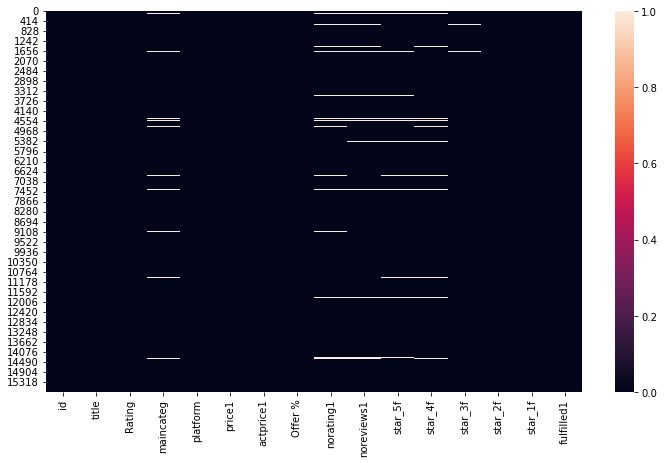

In [131]:
fig= plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

<AxesSubplot:>

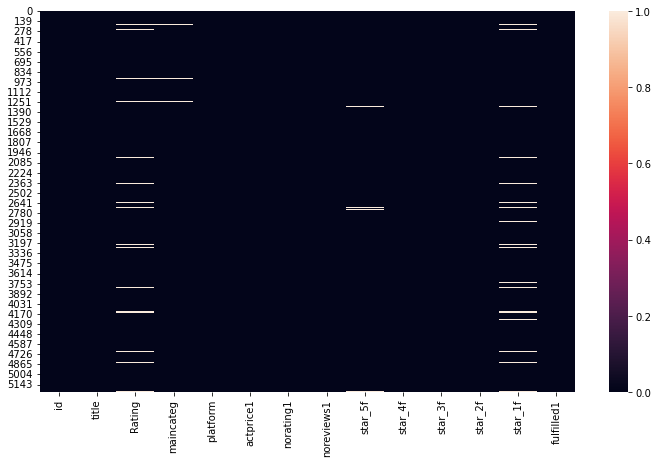

In [132]:
fig= plt.figure(figsize=(12,7))
sns.heatmap(test_wala.isnull())

In [133]:
def categ(cols):
    title= cols[0]
    maincateg= cols[1]
    
    if pd.isnull(maincateg):
        if 'Women' in title:
            return 'Women'
        else:
            return 'Men'
    else:
        return maincateg

In [134]:
test_wala['maincateg']= test_wala[['title','maincateg']].apply(categ,axis=1)

<AxesSubplot:>

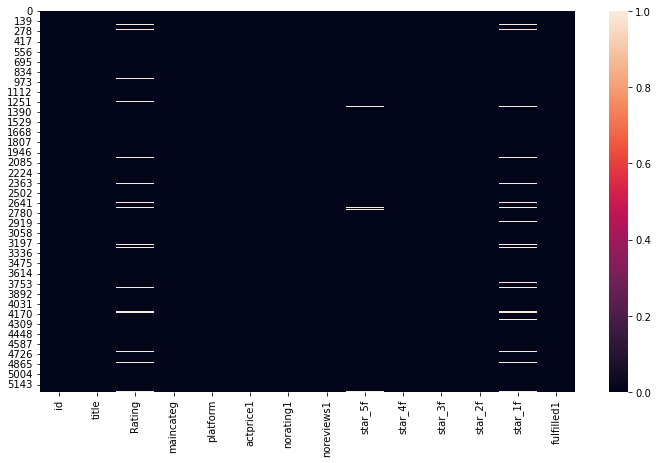

In [135]:
fig= plt.figure(figsize=(12,7))
sns.heatmap(test_wala.isnull())

In [136]:
test_wala['star_5f']= test_wala['star_5f'].fillna(value='0')

In [137]:
test_wala['star_1f']= test_wala['star_1f'].fillna(value='0')

<AxesSubplot:>

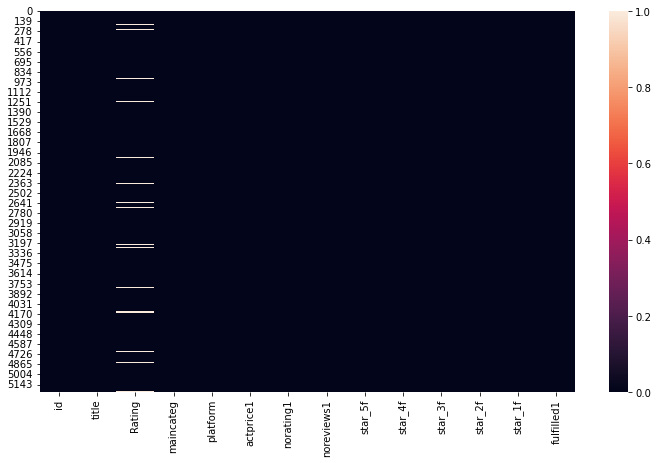

In [138]:
fig= plt.figure(figsize=(12,7))
sns.heatmap(test_wala.isnull())

In [139]:
test_wala= test_wala.drop('title',axis=1)

In [140]:
test_wala.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [141]:
def rate(cols):
    ratings= int(cols[0])
    star_5= int(cols[1])
    star_4= int(cols[2])
    star_3= int(cols[3])
    star_2= int(cols[4])
    star_1= int(cols[5])
    if pd.isnull(ratings):
        sum_of_people= ('star_5'+'star_4'+'star_3'+'star_2'+'star_1')
        product_of_people= ('star_5'*5+'star_4'*4+'star_3'*3+'star_2'*2+'star_1')
        final= product_of_people/sum_of_people
        return sum_of_people
    else:
        return ratings

In [142]:
test_wala[pd.isnull(test_wala['Rating'])]

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
35,17580,NaN,Women,Flipkart,999,473,68,0,119,45,16,0,1
84,11588,NaN,Men,Flipkart,899,41,7,22.0,9,3,1,6.0,0
88,15449,NaN,Men,Flipkart,499,3073,401,1248.0,517,510,274,0,1
90,12342,NaN,Men,Flipkart,2499,52,5,0,13,6,4,0,1
91,9065,NaN,Men,Flipkart,999,2465,274,1408.0,407,258,137,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,9552,NaN,Men,Flipkart,499,11,2,8.0,0,0,1,0,0
5177,16621,NaN,Women,Flipkart,599,1057,94,0,229,172,79,0,1
5179,9466,NaN,Men,Flipkart,499,5227,686,2539.0,1019,687,344,0,0
5188,3575,NaN,Women,Flipkart,699,53,8,30.0,9,7,2,0,0


In [143]:
type(test_wala['star_2f'][0])

numpy.int64

In [144]:
test_wala.head(2)

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1


In [145]:
test_wala['Rating']=test_wala['Rating'].fillna(value='0')

In [146]:
test_wala[test_wala['Rating']=='0'].head(9)

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
35,17580,0,Women,Flipkart,999,473,68,0,119,45,16,0,1
84,11588,0,Men,Flipkart,899,41,7,22.0,9,3,1,6.0,0
88,15449,0,Men,Flipkart,499,3073,401,1248.0,517,510,274,0,1
90,12342,0,Men,Flipkart,2499,52,5,0,13,6,4,0,1
91,9065,0,Men,Flipkart,999,2465,274,1408.0,407,258,137,0,0
129,18332,0,Women,Flipkart,249,412,60,211.0,118,41,19,0,1
142,20713,0,Women,Flipkart,599,692,74,341.0,138,99,30,84.0,0
146,5574,0,Women,Flipkart,699,7128,1203,3846.0,1358,797,333,0,0
182,20276,0,Men,Flipkart,5995,325,58,205.0,62,29,9,0,1


In [147]:
sum_of=int(test_wala['star_1f'][182])+int(test_wala['star_2f'][182])+int(test_wala['star_3f'][182])+int(test_wala['star_4f'][182])+ int(test_wala['star_5f'][182])
sum_of

305

In [148]:
for i in range(5244):
    prod_of=int(test_wala['star_1f'][i])*1+int(test_wala['star_2f'][i])*2+int(test_wala['star_3f'][i])*3+int(test_wala['star_4f'][i])*4+ int(test_wala['star_5f'][i])*5
    sum_of=int(test_wala['star_1f'][i])+int(test_wala['star_2f'][i])+int(test_wala['star_3f'][i])+int(test_wala['star_4f'][i])+ int(test_wala['star_5f'][i])
    if (sum_of=='0'):
        final= prod_of/sum_of
        if (test_wala['Rating'][i]=='0'):
            test_wala['Rating'][i]=final
        else:
            pass
    else:
        pass

<AxesSubplot:>

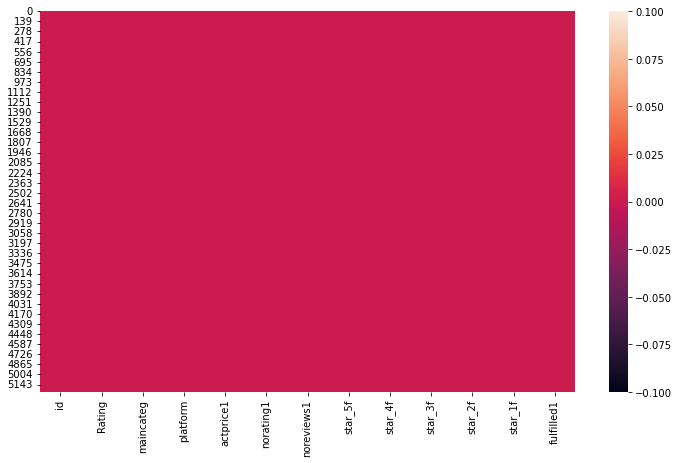

In [149]:
fig= plt.figure(figsize=(12,7))
sns.heatmap(test_wala.isnull())

In [150]:
test_wala.shape

(5244, 13)

In [151]:
def categ(cols):
    title= cols[0]
    maincateg= cols[1]
    
    if pd.isnull(maincateg):
        if 'Women' in title:
            return 'Women'
        else:
            return 'Men'
    else:
        return maincateg

In [152]:
df['maincateg']= df[['title','maincateg']].apply(categ,axis=1)

In [153]:
df['maincateg'].isnull().sum()

0

<AxesSubplot:>

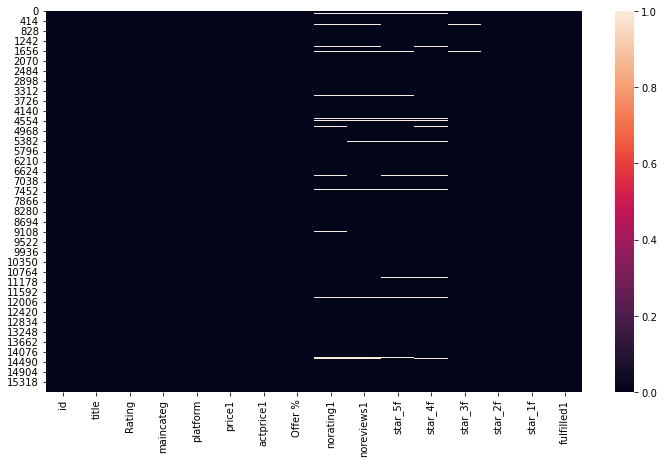

In [154]:
fig= plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

<AxesSubplot:>

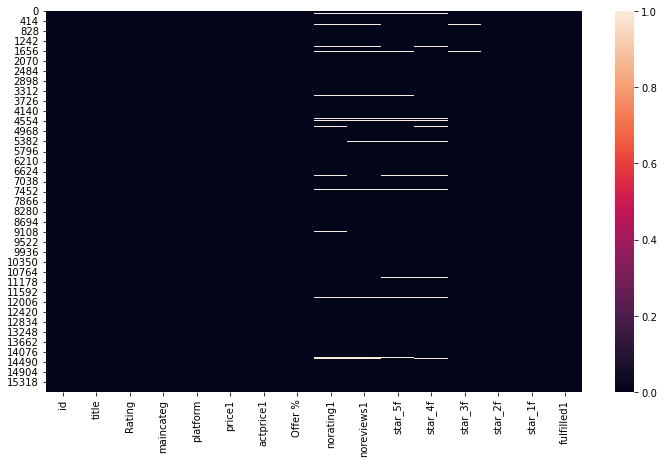

In [155]:
fig= plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

In [156]:
df= df.fillna(value='0')

In [157]:
df1= df.copy()

In [158]:
df= df.drop('norating1',axis=1)

In [159]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,3.0,35.0,21.0,7.0,7,7,1


In [160]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,3.0,35.0,21.0,7.0,7,7,1


In [161]:
df=df.drop('title',axis=1)

In [162]:
df

,id,Rating,maincateg,platform,price1,actprice1,Offer %,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,3.9,Women,Flipkart,698,999,30.13%,7.0,17.0,9.0,6.0,3,3,0
1,5120,3.8,Men,Flipkart,999,1999,50.03%,69.0,264.0,92.0,73.0,29,73,1
2,18391,4.4,Women,Flipkart,2749,4999,45.01%,4.0,11.0,3.0,2.0,1,0,1
3,495,4.2,Men,Flipkart,518,724,15.85%,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,3.9,Men,Flipkart,1379,2299,40.02%,3.0,35.0,21.0,7.0,7,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,16554,4.3,Women,Flipkart,567,1199,52.71%,114.0,485.0,177.0,61.0,41,43,0
15726,19600,3.9,Women,Flipkart,499,998,50.00%,34.0,120.0,45.0,37.0,16,28,1
15727,6733,3.7,Women,Flipkart,329,499,34.07%,18.0,0,0,20.0,10,15,1
15728,3889,3.9,Men,Amazon,2249,4499,50.01%,479.0,13.0,6.0,10.0,25,47,1


In [163]:
category= pd.get_dummies(df['maincateg'],drop_first=True)

In [164]:
df['platform'].unique()

array(['Flipkart', 'Amazon'], dtype=object)

In [165]:
platformss= pd.get_dummies(df['platform'],drop_first=True)

In [166]:
platformss

,Flipkart
0,1
1,1
2,1
3,1
4,1
...,...
15725,1
15726,1
15727,1
15728,0


In [167]:
df= pd.concat([df,platformss,category],axis=1)

In [168]:
df

,id,Rating,maincateg,platform,price1,actprice1,Offer %,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,Flipkart,Women
0,16695,3.9,Women,Flipkart,698,999,30.13%,7.0,17.0,9.0,6.0,3,3,0,1,1
1,5120,3.8,Men,Flipkart,999,1999,50.03%,69.0,264.0,92.0,73.0,29,73,1,1,0
2,18391,4.4,Women,Flipkart,2749,4999,45.01%,4.0,11.0,3.0,2.0,1,0,1,1,1
3,495,4.2,Men,Flipkart,518,724,15.85%,6229.0,1045.0,12416.0,5352.0,701,4595,1,1,0
4,16408,3.9,Men,Flipkart,1379,2299,40.02%,3.0,35.0,21.0,7.0,7,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,16554,4.3,Women,Flipkart,567,1199,52.71%,114.0,485.0,177.0,61.0,41,43,0,1,1
15726,19600,3.9,Women,Flipkart,499,998,50.00%,34.0,120.0,45.0,37.0,16,28,1,1,1
15727,6733,3.7,Women,Flipkart,329,499,34.07%,18.0,0,0,20.0,10,15,1,1,1
15728,3889,3.9,Men,Amazon,2249,4499,50.01%,479.0,13.0,6.0,10.0,25,47,1,0,0


In [169]:
df=df.drop(df[['maincateg','platform']],axis=1)

In [170]:
df

,id,Rating,price1,actprice1,Offer %,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,Flipkart,Women
0,16695,3.9,698,999,30.13%,7.0,17.0,9.0,6.0,3,3,0,1,1
1,5120,3.8,999,1999,50.03%,69.0,264.0,92.0,73.0,29,73,1,1,0
2,18391,4.4,2749,4999,45.01%,4.0,11.0,3.0,2.0,1,0,1,1,1
3,495,4.2,518,724,15.85%,6229.0,1045.0,12416.0,5352.0,701,4595,1,1,0
4,16408,3.9,1379,2299,40.02%,3.0,35.0,21.0,7.0,7,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,16554,4.3,567,1199,52.71%,114.0,485.0,177.0,61.0,41,43,0,1,1
15726,19600,3.9,499,998,50.00%,34.0,120.0,45.0,37.0,16,28,1,1,1
15727,6733,3.7,329,499,34.07%,18.0,0,0,20.0,10,15,1,1,1
15728,3889,3.9,2249,4499,50.01%,479.0,13.0,6.0,10.0,25,47,1,0,0


In [171]:
df.columns

Index(['id', 'Rating', 'price1', 'actprice1', 'Offer %', 'noreviews1',
       'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f', 'fulfilled1',
       'Flipkart', 'Women'],
      dtype='object')

In [172]:
test_wala[test_wala['id']==12264]

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
2355,12264,4.2,Men,Flipkart,1990,2239,295,1270.0,547,229,62,131.0,1


In [173]:
test_wala.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [174]:
category= pd.get_dummies(test_wala['maincateg'],drop_first=True)

In [175]:
platformss= pd.get_dummies(test_wala['platform'],drop_first=True)

In [176]:
test_wala= pd.concat([test_wala,platformss,category],axis=1)

In [177]:
test_wala=test_wala.drop(test_wala[['maincateg','platform']],axis=1)

In [178]:
test_wala.head()

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,Flipkart,Women
0,2242,3.8,999,27928,3543,14238.0,4295,3457,1962,3976.0,1,1,0
1,20532,3.9,499,3015,404,1458.0,657,397,182,321.0,1,1,1
2,10648,3.9,999,449,52,229.0,70,71,33,46.0,1,1,1
3,20677,3.9,2999,290,40,141.0,51,49,17,32.0,1,1,0
4,12593,3.9,999,2423,326,1265.0,414,293,143,308.0,0,1,0


In [179]:
test1= test_wala.copy()

In [180]:
test_wala= test_wala.drop(test_wala[['actprice1']],axis=1)

In [181]:
X= df[['id','Rating','actprice1' ,  'noreviews1', 'star_5f',
       'star_4f', 'star_3f', 'star_2f', 'star_1f', 'Flipkart',
       'Women','fulfilled1']]

In [182]:
len(df)

15730

In [183]:
y= df['price1']

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [186]:
from sklearn.preprocessing import StandardScaler

In [187]:
scaler= StandardScaler()

In [188]:
scaler.fit_transform(X_train,y_train)

array([[ 0.41159539,  1.98271167, -0.29934948, ...,  0.14573641,
         0.85977887, -1.23603308],
       [-1.53317663,  0.63170216, -0.29934948, ...,  0.14573641,
         0.85977887,  0.80903983],
       [ 0.23168256, -2.40806924, -0.45884351, ...,  0.14573641,
         0.85977887, -1.23603308],
       ...,
       [-0.95785099,  0.29394978, -0.29934948, ...,  0.14573641,
        -1.16308975,  0.80903983],
       [ 0.67355638, -0.38155497,  0.73736171, ...,  0.14573641,
        -1.16308975,  0.80903983],
       [ 1.37722644, -0.0438026 , -0.69808455, ...,  0.14573641,
         0.85977887,  0.80903983]])

In [189]:
scaler.transform(X_test)

array([[ 0.16446238, -2.07031686, -0.61833754, ..., -6.8617031 ,
        -1.16308975, -1.23603308],
       [ 0.64768979,  0.29394978, -0.39823578, ...,  0.14573641,
        -1.16308975,  0.80903983],
       [-1.37600004,  0.29394978, -0.87671787, ...,  0.14573641,
         0.85977887, -1.23603308],
       ...,
       [-0.47412931, -0.38155497, -0.69808455, ...,  0.14573641,
        -1.16308975,  0.80903983],
       [-1.60616325, -0.0438026 , -0.42534976, ...,  0.14573641,
         0.85977887, -1.23603308],
       [-1.24073591,  0.63170216, -0.49871702, ...,  0.14573641,
        -1.16308975,  0.80903983]])

In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
logic= LogisticRegression()

In [192]:
logic.fit(X_train,y_train)

C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [193]:
predict= logic.predict(X_test)

In [194]:
from sklearn.metrics import classification_report, confusion_matrix

In [195]:
print(confusion_matrix(y_test,predict))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [196]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

          98       0.00      0.00      0.00         1
          99       0.00      0.00      0.00         2
         104       0.00      0.00      0.00         1
         110       0.00      0.00      0.00         2
         123       0.00      0.00      0.00         1
         130       0.00      0.00      0.00         1
         131       0.00      0.00      0.00         1
         138       0.00      0.00      0.00         1
         140       0.00      0.00      0.00         2
         141       0.00      0.00      0.00         3
         148       0.00      0.00      0.00         4
         149       0.00      0.00      0.00         8
         152       0.00      0.00      0.00         1
         154       0.00      0.00      0.00         1
         155       0.00      0.00      0.00         3
         159       0.00      0.00      0.00         1
         160       0.00      0.00      0.00         2
         161       0.00    

C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_cla

In [197]:
logic_score=logic.score(X,y)

In [198]:
logic_score

0.06090273363000636

In [199]:
from sklearn.neighbors import KNeighborsClassifier
knn1= KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train)
pred= knn1.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

          91       0.00      0.00      0.00         0
          98       0.00      0.00      0.00         1
          99       0.00      0.00      0.00         2
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         0
         109       0.00      0.00      0.00         0
         110       0.00      0.00      0.00         2
         123       0.00      0.00      0.00         1
         129       0.00      0.00      0.00         0
         130       1.00      1.00      1.00         1
         131       0.00      0.00      0.00         1
         137       0.00      0.00      0.00         0
         138       0.00      0.00      0.00         1
         140       0.00      0.00      0.00         2
         141       0.00      0.00      0.00         3
         145       0.00      0.00      0.00         0
         148       0.00      0.00      0.00         4
         149       0.12    

C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_cla

In [200]:
knn_score1= knn1.score(X,y)
knn_score1

0.7171646535282898

In [201]:
error=[]

for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

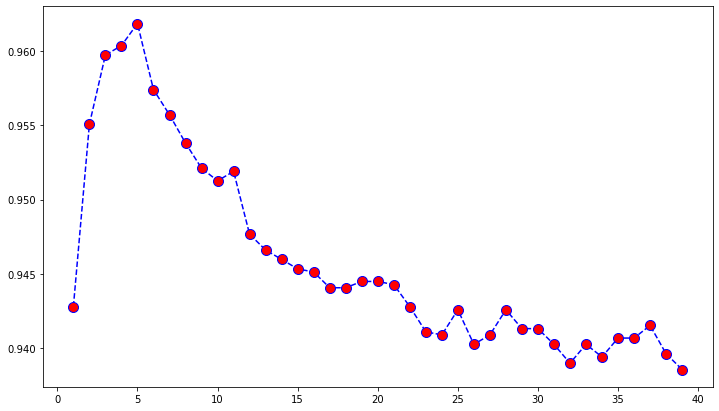

In [202]:
fig= plt.figure(figsize=(12,7))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [203]:
knn2= KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train,y_train)
pred_2= knn2.predict(X_test)

In [204]:
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

          91       0.00      0.00      0.00         0
          98       0.00      0.00      0.00         1
          99       0.00      0.00      0.00         2
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         0
         109       0.00      0.00      0.00         0
         110       0.00      0.00      0.00         2
         123       0.00      0.00      0.00         1
         129       0.00      0.00      0.00         0
         130       0.33      1.00      0.50         1
         131       0.00      0.00      0.00         1
         137       0.00      0.00      0.00         0
         138       0.00      0.00      0.00         1
         140       0.00      0.00      0.00         2
         141       0.00      0.00      0.00         3
         145       0.00      0.00      0.00         0
         148       0.00      0.00      0.00         4
         149       0.06    

C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_cla

In [205]:
knn_score2= knn2.score(X,y)
knn_score2

0.380610298792117

In [206]:
knn38= KNeighborsClassifier(n_neighbors=38)
knn38.fit(X_train,y_train)
pred_38= knn38.predict(X_test)

In [207]:
knn_score38= knn38.score(X,y)
knn_score38

0.09631277813095995

In [208]:
knn12= KNeighborsClassifier(n_neighbors=12)
knn12.fit(X_train,y_train)
pred_12= knn12.predict(X_test)

In [209]:
knn_score12= knn12.score(X,y)
knn_score12

0.13699936427209156

In [210]:
knn25= KNeighborsClassifier(n_neighbors=25)
knn25.fit(X_train,y_train)
pred_25= knn25.predict(X_test)
knn_score25= knn25.score(X,y)
knn_score25

0.106993006993007

In [211]:
knn3= KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)
pred_3= knn3.predict(X_test)
knn_score3= knn3.score(X,y)
knn_score3

0.273744437380801

In [212]:
knn4= KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train,y_train)
pred_4= knn4.predict(X_test)
knn_score4= knn4.score(X,y)
knn_score4

0.22415766052129688

In [213]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt= dt.predict(X_test)
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

          98       0.00      0.00      0.00         1
          99       0.00      0.00      0.00         2
         104       0.00      0.00      0.00         1
         110       0.00      0.00      0.00         2
         123       0.00      0.00      0.00         1
         129       0.00      0.00      0.00         0
         130       1.00      1.00      1.00         1
         131       0.50      1.00      0.67         1
         138       0.00      0.00      0.00         1
         140       0.00      0.00      0.00         2
         141       0.00      0.00      0.00         3
         148       0.67      0.50      0.57         4
         149       0.86      0.75      0.80         8
         151       0.00      0.00      0.00         0
         152       0.00      0.00      0.00         1
         154       0.00      0.00      0.00         1
         155       1.00      0.33      0.50         3
         159       0.33    

C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\ANACONDA\lib\site-packages\sklearn\metrics\_cla

In [214]:
dec_score= dt.score(X,y)
dec_score

0.8336300063572791

In [215]:
X_train.shape

(11011, 12)

In [216]:
X_test.shape

(4719, 12)

In [217]:
test_wala.shape

(5244, 12)

In [218]:
test_wala.columns

Index(['id', 'Rating', 'norating1', 'noreviews1', 'star_5f', 'star_4f',
       'star_3f', 'star_2f', 'star_1f', 'fulfilled1', 'Flipkart', 'Women'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

In [ ]:
rfc_score= rfc.score(X,y)
rfc_score

In [ ]:
rfc_pred = rfc.predict(test_wala)

In [ ]:
test_wala.head(5)

In [ ]:
rfc_pred.shape

In [ ]:
predictions=rfc_pred.reshape(5244,1)
predictions

In [ ]:
res = pd.DataFrame( predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_wala.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["price1"]
res.to_csv("prediction_results3.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

In [ ]:
id1=pd.DataFrame(test_wala['id'])

In [ ]:
id1

In [ ]:
res= pd.concat([id1,res],axis=1)

In [ ]:
res

In [ ]:
res.to_csv("prediction_results5.csv", index = False)

In [ ]:
import xgboost as xgb

In [ ]:
def categ(cols):
    title= cols[0]
    maincateg= cols[1]
    
    if pd.isnull(maincateg):
        if 'Women' in title:
            return 'Women'
        else:
            return 'Men'
    else:
        return maincateg

In [ ]:
df['maincateg']= df[['title','maincateg']].apply(categ,axis=1)

In [ ]:
df['maincateg'].isnull().sum()

In [ ]:
df['star_5f']= df['star_5f'].fillna(value=0)

In [ ]:
df['star_4f']= df['star_4f'].fillna(value=0)

In [ ]:
df['star_3f']= df['star_3f'].fillna(value=0)

In [ ]:
def sum_rate(cols):
    s5= cols[0]
    s4= cols[1]
    s3= cols[2]
    s2= cols[3]
    s1= cols[4]
    rating= cols[5]
    if pd.isnull(rating):
        sum1 = (s5+s4+s3+s2+s1)
        return sum1
    else:
        return rating

In [ ]:
df.columns

In [ ]:
df['norating1']= df[['star_5f', 'star_4f', 'star_3f','star_2f', 'star_1f','norating1']].apply(sum_rate,axis=1)

In [ ]:
df['norating1'].isnull().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df['noreviews1']= df['noreviews1'].fillna(value=0)

In [ ]:
categs= pd.get_dummies(df['maincateg'],drop_first=True)

In [ ]:
categs

In [ ]:
plat= pd.get_dummies(df['platform'],drop_first=True)
plat

In [ ]:
df= pd.concat([df,plat,categs],axis=1)

In [ ]:
df= df.drop(df[['maincateg','platform']],axis=1)

In [ ]:
df=df.drop(df[['title']],axis=1)

In [ ]:
categs= pd.get_dummies(test['maincateg'],drop_first=True)

In [ ]:
test= pd.concat([test,plat,categs],axis=1)

In [ ]:
test= test.drop(test[['maincateg','platform']],axis=1)

In [ ]:
test=test.drop(test[['title']],axis=1)

In [ ]:
test.isnull().sum()

In [ ]:
test['star_1f']= test['star_1f'].fillna(value=0)

In [ ]:
def fill_crow(cols):
    star1= cols[0]
    star2= cols[1]
    star3= cols[2]
    star4= cols[3]
    star5= cols[4]
    number= cols[5]
    sum_hoga= star2+star3+star4+star1
    bacha= number- sum_hoga
    if pd.isnull(star5):
        return bacha
    else:
        return star5

In [ ]:
test['star_5f']= test[['star_1f','star_2f','star_3f','star_4f','star_5f','norating1']].apply(fill_crow,axis=1)

In [ ]:
def rate_bharo(cols):
    star1= cols[0]
    star2= cols[1]
    star3= cols[2]
    star4= cols[3]
    star5= cols[4]
    number= cols[5]
    rate= cols[6]
    prod= star1*1+star2*2+star3*3+star4*4+star5*5
    final= prod/number
    if pd.isnull(rate):
        return final
    else:
        return rate

In [ ]:
test['Rating']= test[['star_1f','star_2f','star_3f','star_4f','star_5f','norating1','Rating']].apply(rate_bharo,axis=1)

In [ ]:
test[pd.isnull(test['star_1f']) & pd.isnull(test['star_5f']) & pd.isnull(test['Rating'])].head()

In [ ]:
def rate(cols):
    number= int(cols[0])
    rating= (cols[5])
    if pd.isnull(rating):
        prod22= s5*5+s4*4+s3*3+s2*2+s1
        if sum22==0:
            print('here')
            print(s1)
        else:
            final22= prod22/sum22
            return final22
    else:
        return rating

In [ ]:
test['Rating']= test[['star_5f','star_4f', 'star_3f', 'star_2f', 'star_1f','Rating']].apply(rate,axis=1)

In [ ]:
test[(test['star_4f']==0)&(test['star_5f']==0)].head(2)

In [ ]:
X= df[['id', 'Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f','star_4f', 'star_3f', 'star_2f', 'star_1f', 'fulfilled1', 'Flipkart','Women']]
y=df['price1']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

In [ ]:
xgbr.fit(X_train, y_train)

In [ ]:
score = xgbr.score(X_train, y_train)   
print("Training score: ", score) 

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
scores = cross_val_score(xgbr, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

In [ ]:
score = xgbr.score(X_train, y_train)   
print("Training score: ", score) 

In [ ]:
xgb_pred= xgbr.predict(test)

In [ ]:
xgb_pred.shape

In [ ]:
predictions=xgb_pred.reshape(5244,1)
predictions

In [ ]:
res = pd.DataFrame( predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["price1"]
res.to_csv("prediction_results12.csv", index = False)

In [ ]:
id1=pd.DataFrame(test['id'])
res= pd.concat([id1,res],axis=1)
res

In [ ]:
res.to_csv("prediction_results12.csv", index = False)